# Preprocess Train Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import confusion_table
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [105]:
traindata=pd.read_csv("train.csv")
traindata.head()

Unnamed: 0   ROA(C) before interest and depreciation before interest  \
0        2490                                           0.412178          
1        6721                                           0.477502          
2          82                                           0.480622          
3        3960                                           0.547701          
4        2362                                           0.496271          

    ROA(A) before interest and % after tax  \
0                                 0.474270   
1                                 0.537015   
2                                 0.487080   
3                                 0.546064   
4                                 0.556258   

    ROA(B) before interest and depreciation after tax  \
0                                           0.457733    
1                                           0.531774    
2                                           0.534611    
3                                           0.579314    
4                                           0.540232    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.000000                      0.000000   
1                 0.617492                      0.617377   
2                 0.617867                      0.617867   
3                 0.608008                      0.608008   
4                 0.598481                      0.598481   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.988045                    0.784312   
1                0.999009                    0.797387   
2                0.999022                    0.797242   
3                0.999119                    0.797613   
4                0.999012                    0.797448   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.796607                                      0.303526   
1                      0.809315                                      0.303436   
2                      0.809177                                      0.303157   
3                      0.809432                                      0.303601   
4                      0.809350                                      0.303535   

   ...   Total assets to GNP price   No-credit Interval  \
0  ...                    0.002466             0.626786   
1  ...                    0.000633             0.623705   
2  ...                    0.010964             0.623702   
3  ...                    0.004277             0.623114   
4  ...                    0.001606             0.624292   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                0.000000                             0.838652   
1                0.617488                             0.840200   
2                0.617865                             0.835834   
3                0.608003                             0.840497   
4                0.598483                             0.841437   

    Liability to Equity   Degree of Financial Leverage (DFL)  \
0              0.274813                             0.026789   
1              0.277850                             0.027683   
2              0.288331                             0.026665   
3              0.276189                             0.026910   
4              0.282287                             0.026821   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.565148                   1   
1                                           0.567464                   1   
2                                           0.564475                   1   
3                                           0.565666                   1   
4                                           0.565295                   1   

    Equity to Liability  Bankrupt?  
0              0.743588          0  
1              0.040781          0  
2              0.017324          0  

In [106]:
traindata.describe()

Unnamed: 0   ROA(C) before interest and depreciation before interest  \
count  5455.000000                                        5455.000000          
mean   3408.896425                                           0.504850          
std    1985.117561                                           0.060078          
min       0.000000                                           0.000000          
25%    1671.500000                                           0.476235          
50%    3403.000000                                           0.502901          
75%    5148.500000                                           0.535197          
max    6817.000000                                           0.864964          

        ROA(A) before interest and % after tax  \
count                              5455.000000   
mean                                  0.558483   
std                                   0.065299   
min                                   0.000000   
25%                                   0.535516   
50%                                   0.559911   
75%                                   0.588830   
max                                   0.984736   

        ROA(B) before interest and depreciation after tax  \
count                                        5455.000000    
mean                                            0.553227    
std                                             0.061118    
min                                             0.000000    
25%                                             0.527062    
50%                                             0.552278    
75%                                             0.583730    
max                                             0.932598    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              5455.000000                   5455.000000   
mean                  0.607915                      0.607898   
std                   0.016327                      0.016314   
min                   0.000000                      0.000000   
25%                   0.600365                      0.600351   
50%                   0.605897                      0.605868   
75%                   0.613691                      0.613655   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             5455.000000                 5455.000000   
mean                 0.998969                    0.797377   
std                  0.000879                    0.002826   
min                  0.962961                    0.616328   
25%                  0.998970                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999094                    0.797579   
max                  1.000000                    0.850681   

        After-tax net Interest Rate  \
count                   5455.000000   
mean                       0.809285   
std                        0.002763   
min                        0.636191   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        0.864386   

        Non-industry income and expenditure/revenue  ...  \
count                                   5455.000000  ...   
mean                                       0.303502  ...   
std                                        0.004043  ...   
min                                        0.062507  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        0.446321  ...   

        Total assets to GNP price   No-credit Interval  \
count                5.455000e+03          5455.000000   
mean                 1.995674e+07             0.623946   
std                  3.832637e+08             0.013268   
min                  1.015558e-04 

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': ' Net Income Flag'}>,
        <Axes: title={'center': ' Liability-Assets Flag'}>]], dtype=object)

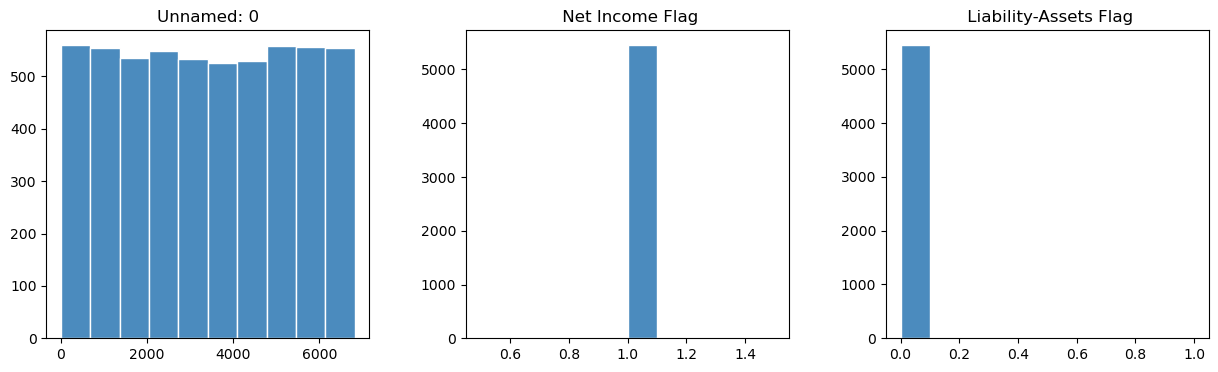

In [111]:
columns_to_plot = ["Unnamed: 0", " Net Income Flag", " Liability-Assets Flag"]
traindata.hist(
    column=columns_to_plot,
    edgecolor='white',
    figsize=(15, 4),      
    layout=(1, 3),           
    color='#4B8BBE',       
    grid=False             
)

Drop the first columns which may means the company id.

Drop the columns with Flag "Net Income Flag" "Liability-Assets Flag" which are all 1 or all 0.

All of this column don't have meaning for training model

In [5]:
traindata=traindata.iloc[:,1:]
traindata=traindata.drop(columns=[" Net Income Flag"," Liability-Assets Flag"])
traindata.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.412178          
1                                           0.477502          
2                                           0.480622          
3                                           0.547701          
4                                           0.496271          

    ROA(A) before interest and % after tax  \
0                                 0.474270   
1                                 0.537015   
2                                 0.487080   
3                                 0.546064   
4                                 0.556258   

    ROA(B) before interest and depreciation after tax  \
0                                           0.457733    
1                                           0.531774    
2                                           0.534611    
3                                           0.579314    
4                                           0.540232    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.000000                      0.000000   
1                 0.617492                      0.617377   
2                 0.617867                      0.617867   
3                 0.608008                      0.608008   
4                 0.598481                      0.598481   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.988045                    0.784312   
1                0.999009                    0.797387   
2                0.999022                    0.797242   
3                0.999119                    0.797613   
4                0.999012                    0.797448   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.796607                                      0.303526   
1                      0.809315                                      0.303436   
2                      0.809177                                      0.303157   
3                      0.809432                                      0.303601   
4                      0.809350                                      0.303535   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.767874  ...                     0.766285   
1                               0.781573  ...                     0.798299   
2                               0.781580  ...                     0.766035   
3                               0.781653  ...                     0.804056   
4                               0.781614  ...                     0.810103   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.002466             0.626786                0.000000   
1                    0.000633             0.623705                0.617488   
2                    0.010964             0.623702                0.617865   
3                    0.004277             0.623114                0.608003   
4                    0.001606             0.624292                0.598483   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.838652              0.274813   
1                             0.840200              0.277850   
2                             0.835834              0.288331   
3                             0.840497              0.276189   
4                             0.841437              0.282287   

    Degree of Financial Leverage (DFL)  \
0                             0.026789   
1                             0.027683   
2                             0.026665   
3                             0.026910   
4                             0.026821   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.565148                0.743588   
1                                           0.567464                0.040781  

In [6]:
traindata.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt?                                                   0
Length: 94, dtype: int64

# Split data to train test validation 

Split the train data to three dataset "train set" "validation set" "test set" for testing the model's robustness

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(traindata, test_size=0.45, random_state=68)
valid_set, test_set=train_test_split(test_set, test_size=0.5, random_state=55)
print(len(train_set), len(valid_set), len(test_set))

3000 1227 1228


Seprate each dataset to X and Y columns

In [8]:
X_train_1=train_set.drop("Bankrupt?",axis=1)
Y_train_1=pd.DataFrame(train_set["Bankrupt?"])
X_test=test_set.drop("Bankrupt?",axis=1)
Y_test=pd.DataFrame(test_set["Bankrupt?"])
X_valid=valid_set.drop("Bankrupt?",axis=1)
Y_valid=pd.DataFrame(valid_set["Bankrupt?"])

In [9]:
"""from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  
X_filtered = selector.fit_transform(X_data)
filter_col=selector.get_support()
low_variance=X_data.columns[filter_col]
filter_col"""

'from sklearn.feature_selection import VarianceThreshold\nselector = VarianceThreshold(threshold=0.01)  \nX_filtered = selector.fit_transform(X_data)\nfilter_col=selector.get_support()\nlow_variance=X_data.columns[filter_col]\nfilter_col'

# Outliers

Remove the outliers of our data which may cause the bad influence for my model

Finding the number of 0.1% and 99.9%. Removing the row which any columns number are below 0.1% or above 99.9%

In [10]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    return categorical_cols, numerical_cols
categorical_cols,numerical_cols=get_num_cat_columns(X_train_1)

In [11]:
def Winsorization_Method(columns,x_train,y_train,a,b):
    outliers=[]
    for col in columns:
        q1=np.percentile(x_train[col],a)
        q2=np.percentile(x_train[col],b)
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)
    outliers=set(outliers)
    outliers=list(outliers)
    ratio=round(len(outliers)/len(x_train)*100,2)
    x_train.drop(x_train.index[outliers],inplace=True)
    y_train.drop(y_train.index[outliers],inplace=True)
    return ratio,x_train,y_train
ratio,X_train,Y_train=Winsorization_Method(numerical_cols,X_train_1,Y_train_1,a=0.1,b=99.9)
ratio

7.43

In [12]:
X_train.shape, Y_train.shape

((2777, 93), (2777, 1))

# Standard

Because each columns are various number like money ratio or something else, I use standardscaler to standardlize my data for each dataset

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler=StandardScaler()
scaler.fit(X_train)
std_X_train_num=scaler.transform(X_train)
std_X_train=pd.DataFrame(std_X_train_num,columns=X_train.columns)
std_X_test_num=scaler.transform(X_test)
std_X_test=pd.DataFrame(std_X_test_num,columns=X_train.columns)
std_X_valid_num=scaler.transform(X_valid)
std_X_valid=pd.DataFrame(std_X_valid_num,columns=X_train.columns)
y_train=Y_train.values.ravel()
y_test=Y_test.values.ravel()
y_valid=Y_valid.values.ravel()

In [113]:
std_X_train.describe()

ROA(C) before interest and depreciation before interest  \
count                                       2.777000e+03         
mean                                       -1.948427e-15         
std                                         1.000180e+00         
min                                        -4.793496e+00         
25%                                        -5.467029e-01         
50%                                        -5.682768e-02         
75%                                         5.299360e-01         
max                                         4.227996e+00         

       ROA(A) before interest and % after tax  \
count                            2.777000e+03   
mean                             2.782554e-16   
std                              1.000180e+00   
min                             -6.601216e+00   
25%                             -4.240586e-01   
50%                             -7.719172e-03   
75%                              5.124625e-01   
max                              4.042128e+00   

       ROA(B) before interest and depreciation after tax  \
count                                       2.777000e+03   
mean                                       -1.643946e-16   
std                                         1.000180e+00   
min                                        -5.509682e+00   
25%                                        -4.982921e-01   
50%                                        -5.075780e-02   
75%                                         5.379984e-01   
max                                         4.017826e+00   

       Operating Gross Margin  Realized Sales Gross Margin  \
count            2.777000e+03                 2.777000e+03   
mean             4.597930e-15                 1.007093e-14   
std              1.000180e+00                 1.000180e+00   
min             -5.436176e+00                -5.443618e+00   
25%             -6.380775e-01                -6.372867e-01   
50%             -1.903113e-01                -1.880912e-01   
75%              4.861656e-01                 4.775404e-01   
max              4.780376e+00                 4.791752e+00   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count           2.777000e+03               2.777000e+03   
mean           -2.731841e-13              -2.329413e-14   
std             1.000180e+00               1.000180e+00   
min            -1.469354e+01              -1.182302e+01   
25%            -2.563188e-01              -1.861560e-01   
50%             1.930997e-02               3.116347e-02   
75%             4.131542e-01               3.583281e-01   
max             3.106601e+00               1.634198e+01   

       After-tax net Interest Rate  \
count                 2.777000e+03   
mean                  2.362286e-13   
std                   1.000180e+00   
min                  -1.232141e+01   
25%                  -1.596604e-01   
50%                   4.412000e-02   
75%                   3.579247e-01   
max                   1.323762e+01   

       Non-industry income and expenditure/revenue  \
count                                 2.777000e+03   
mean                                 -6.366739e-14   
std                                   1.000180e+00   
min                                  -1.242050e+01   
25%                                  -1.564421e-01   
50%                                  -2.671463e-02   
75%                                   1.177417e-01   
max                                   2.574939e+01   

       Continuous interest rate (after tax)  ...  \
count                          2.777000e+03  ...   
mean                           9.188185e-14  ...   
std                            1.000180e+00  ...   
min                           -2.996543e+01  ...   
25%                           -1.277087e-01  ...   
50%                            4.206756e-02  ...   
75%                            3.161508e-01  ...   
max                            1.160572e+01  ...   

       Current Liability to Current Ass

In [88]:
std_X_valid.describe()

ROA(C) before interest and depreciation before interest  \
count                                        1227.000000         
mean                                           -0.075839         
std                                             1.112941         
min                                            -8.180970         
25%                                            -0.584734         
50%                                            -0.084898         
75%                                             0.483756         
max                                             3.798789         

       ROA(A) before interest and % after tax  \
count                             1227.000000   
mean                                -0.088078   
std                                  1.147475   
min                                 -8.976000   
25%                                 -0.450747   
50%                                 -0.032952   
75%                                  0.414928   
max                                  3.851912   

       ROA(B) before interest and depreciation after tax  \
count                                        1227.000000   
mean                                           -0.082614   
std                                             1.141129   
min                                            -9.309745   
25%                                            -0.540559   
50%                                            -0.061698   
75%                                             0.474846   
max                                             3.813950   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             1227.000000                  1227.000000   
mean                -0.015786                    -0.014574   
std                  1.012239                     1.008379   
min                 -6.293087                    -6.302108   
25%                 -0.631439                    -0.627009   
50%                 -0.181259                    -0.179627   
75%                  0.443924                     0.447312   
max                  4.418904                     4.465284   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            1227.000000                1227.000000   
mean               -0.308986                  -0.216293   
std                 4.329941                   3.152696   
min              -123.957016                 -90.674036   
25%                -0.257252                  -0.194059   
50%                 0.024910                   0.015358   
75%                 0.397600                   0.328891   
max                 3.369786                  20.398740   

       After-tax net Interest Rate  \
count                  1227.000000   
mean                     -0.200698   
std                       2.757224   
min                     -73.999230   
25%                      -0.168437   
50%                       0.037698   
75%                       0.319181   
max                      21.251409   

       Non-industry income and expenditure/revenue  \
count                                  1227.000000   
mean                                     -0.028769   
std                                       1.313618   
min                                     -17.138274   
25%                                      -0.164940   
50%                                      -0.032946   
75%                                       0.109244   
max                                      28.041998   

       Continuous interest rate (after tax)  ...  \
count                           1227.000000  ...   
mean                              -0.169918  ...   
std                                2.360304  ...   
min                              -63.928816  ...   
25%                               -0.143429  ...   
50%                                0.033190  ...   
75%                                0.274169  ...   
max                               18.319833  ...   

       Current Liability to Current Ass

Construct a histogram to see if the sample is balance or not.

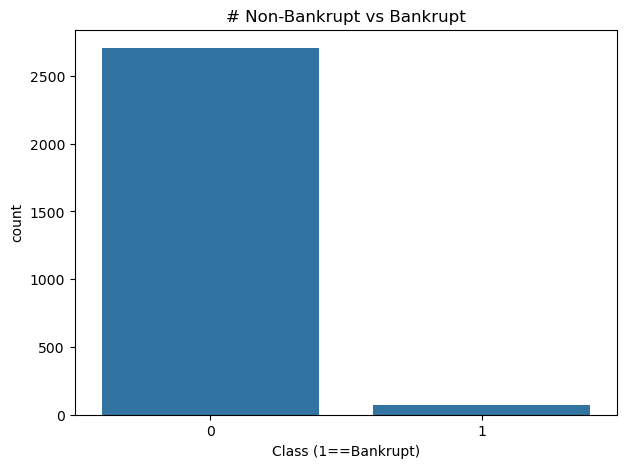

In [18]:
import seaborn as sns
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="Bankrupt?", data=Y_train)
_ = plt.title('# Non-Bankrupt vs Bankrupt')
_ = plt.xlabel('Class (1==Bankrupt)')

# SMOTE to balance the data

Use SMOTE to balance the train dataset

In [19]:
import imblearn
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto',random_state=100)
balance_X_train, balance_Y_train=smt.fit_resample(std_X_train,Y_train)

In [20]:
balance_X_train.shape,balance_Y_train.shape

((5410, 93), (5410, 1))

array([[<Axes: title={'center': ' ROA(C) before interest and depreciation before interest'}>,
        <Axes: title={'center': ' ROA(A) before interest and % after tax'}>,
        <Axes: title={'center': ' ROA(B) before interest and depreciation after tax'}>,
        <Axes: title={'center': ' Operating Gross Margin'}>,
        <Axes: title={'center': ' Realized Sales Gross Margin'}>,
        <Axes: title={'center': ' Operating Profit Rate'}>,
        <Axes: title={'center': ' Pre-tax net Interest Rate'}>,
        <Axes: title={'center': ' After-tax net Interest Rate'}>,
        <Axes: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <Axes: title={'center': ' Continuous interest rate (after tax)'}>],
       [<Axes: title={'center': ' Operating Expense Rate'}>,
        <Axes: title={'center': ' Research and development expense rate'}>,
        <Axes: title={'center': ' Cash flow rate'}>,
        <Axes: title={'center': ' Interest-bearing debt interest rate'}>,
  

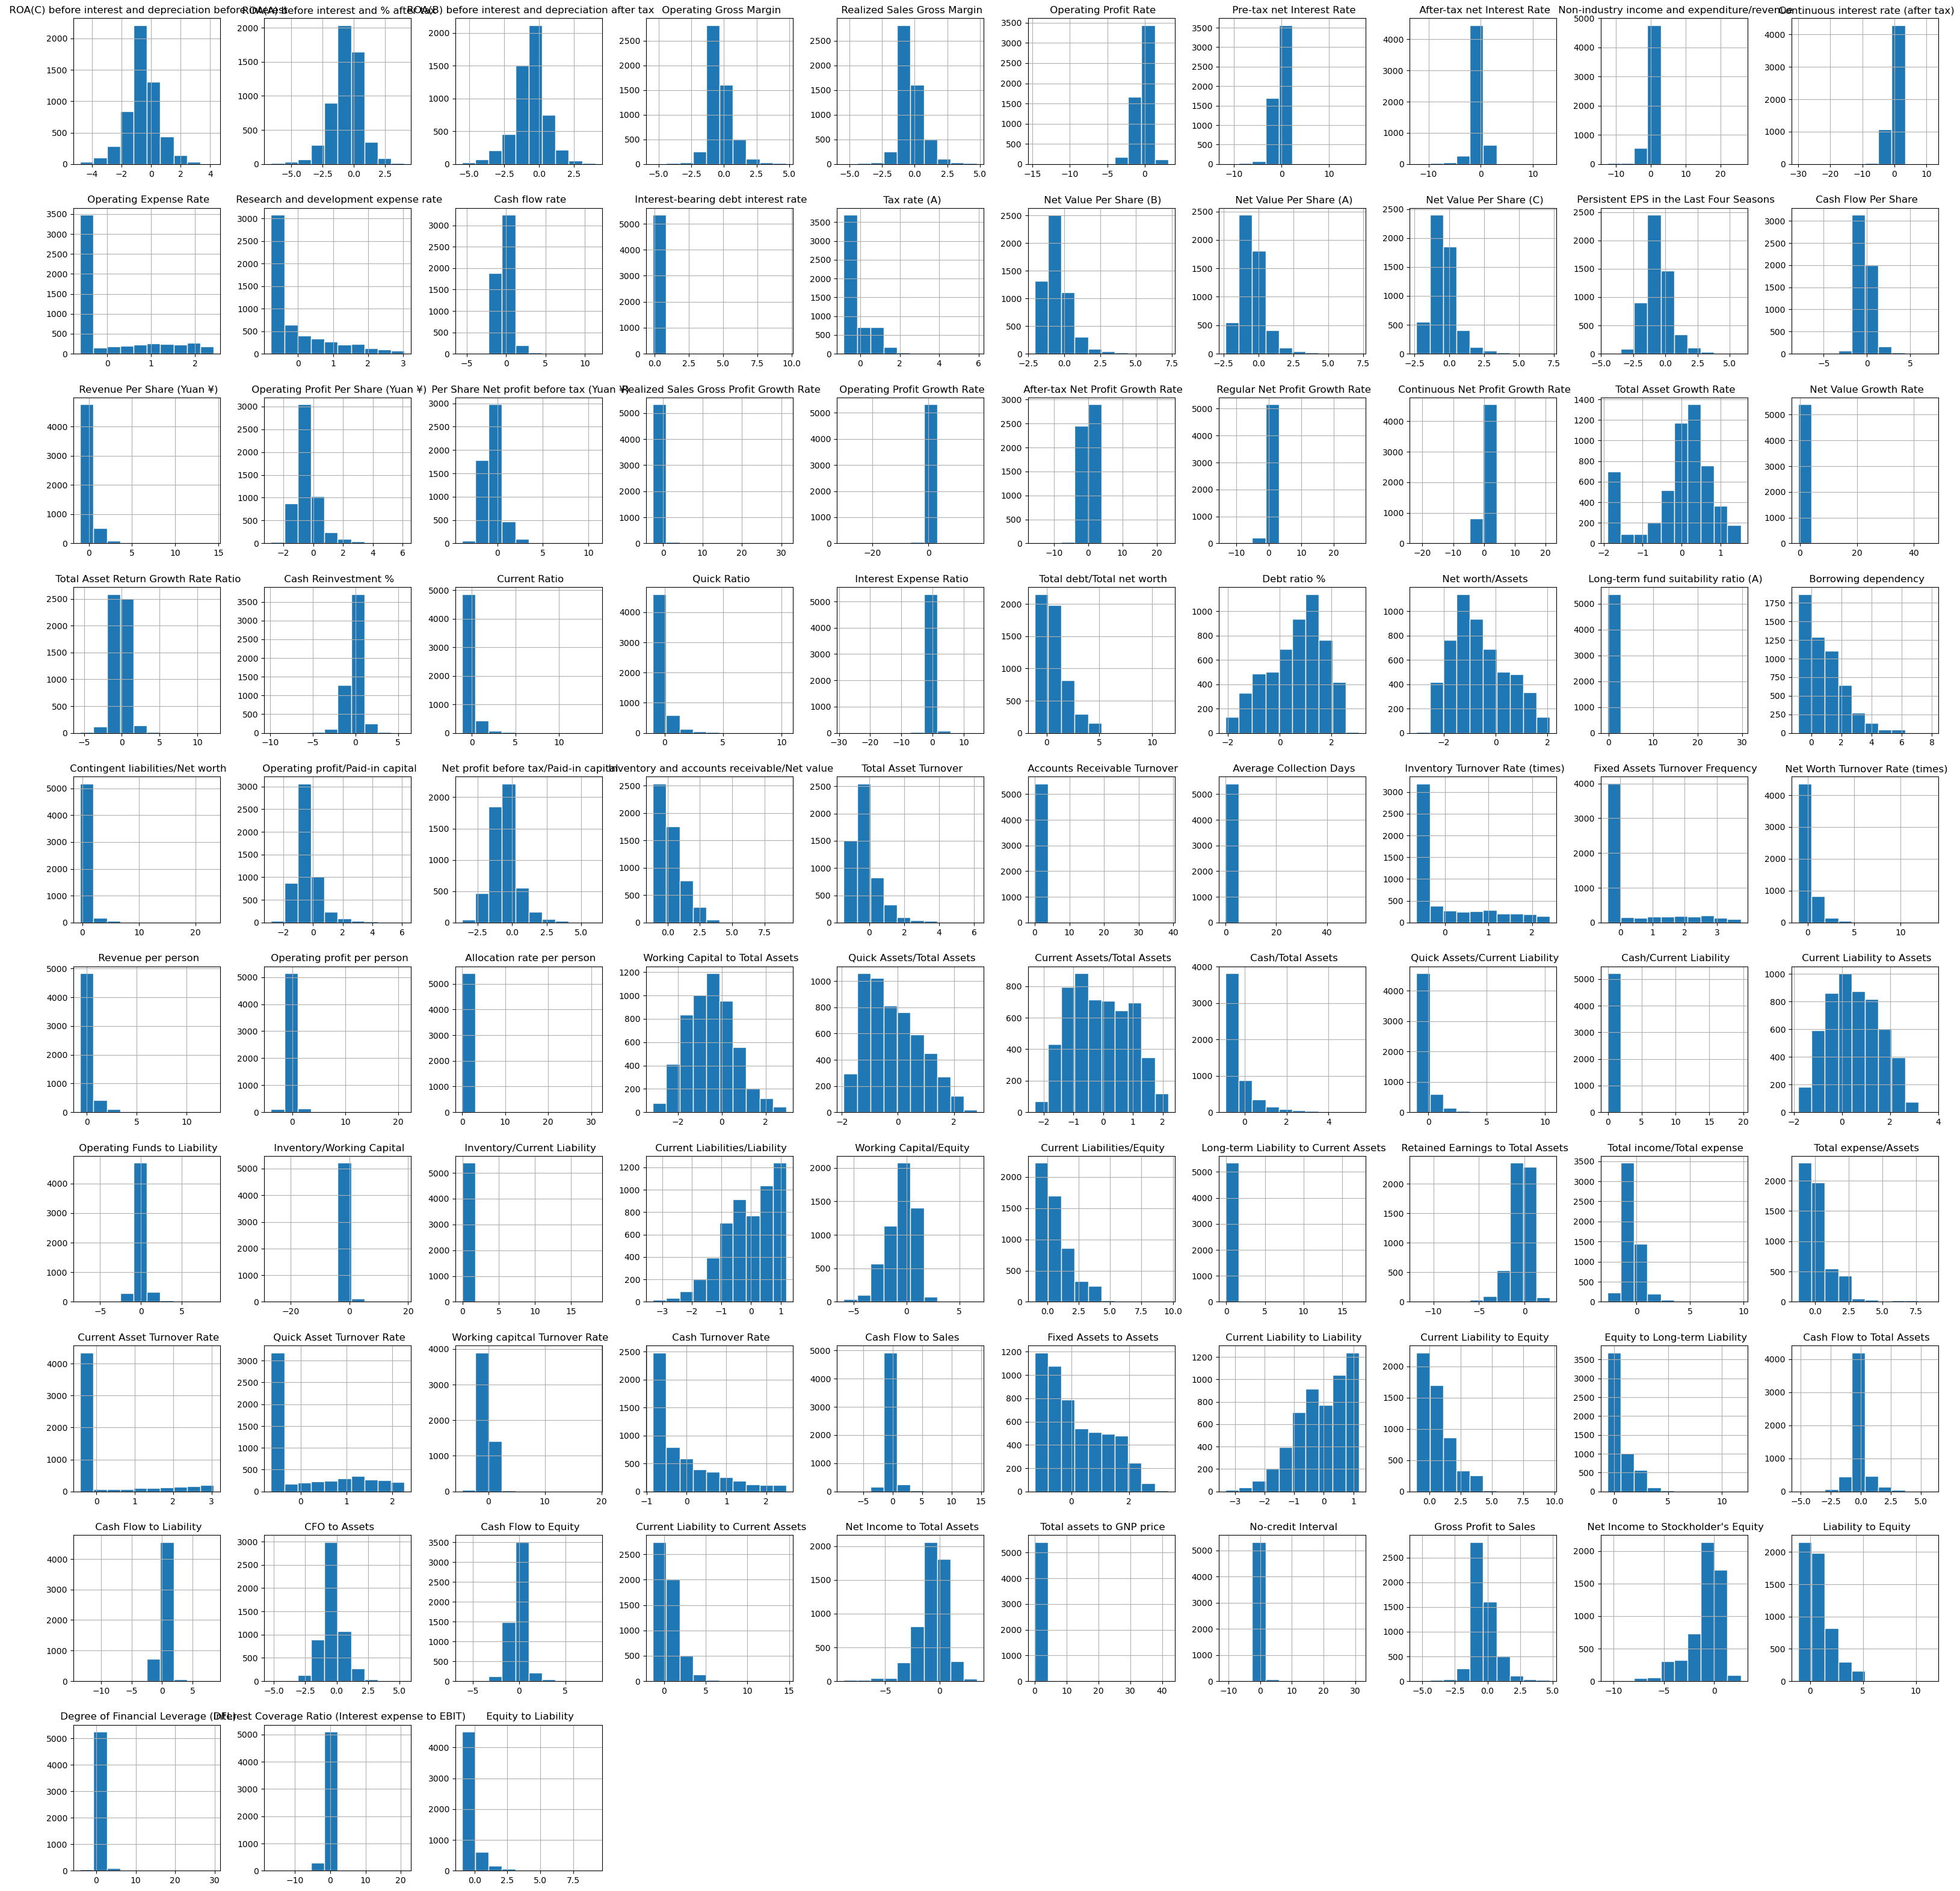

In [21]:
balance_X_train.hist(figsize=(40,40), edgecolor='white')

# PCA

Use PCA to reduce the dimension and reserve the dimension which capture 95% ratio of the variance

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(balance_X_train)
pca_X_train=pca.transform(balance_X_train)
pca_X_valid=pca.transform(std_X_valid)
pca_X_test=pca.transform(std_X_test)

In [23]:
print(len(pca_X_train[1,:]))
print(len(pca_X_test[1,:]))
print(sum(pca.explained_variance_ratio_))

42
42
0.9506116017945153


In [24]:
n_components=pca.n_components_
columns=[f'PCA{i+1}' for i in range(n_components)]
df_pca_X_train=pd.DataFrame(pca_X_train,columns=columns)

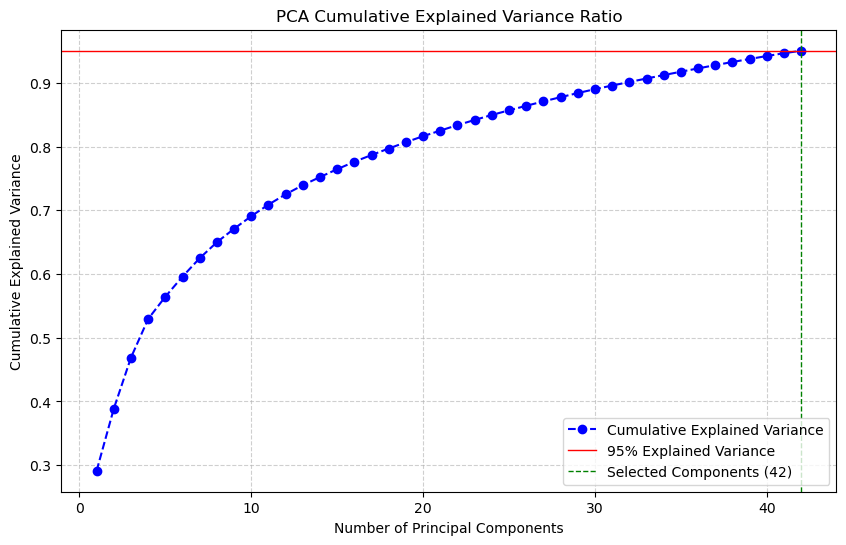

In [115]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    linestyle='--',
    color='b',
    label='Cumulative Explained Variance'
)
plt.axhline(y=0.95, color='r', linestyle='-', linewidth=1, label='95% Explained Variance')
plt.axvline(x=pca.n_components_, color='g', linestyle='--', linewidth=1, label=f'Selected Components ({pca.n_components_})')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plot and see the correlation between each dimension of the PCA data

<Axes: >

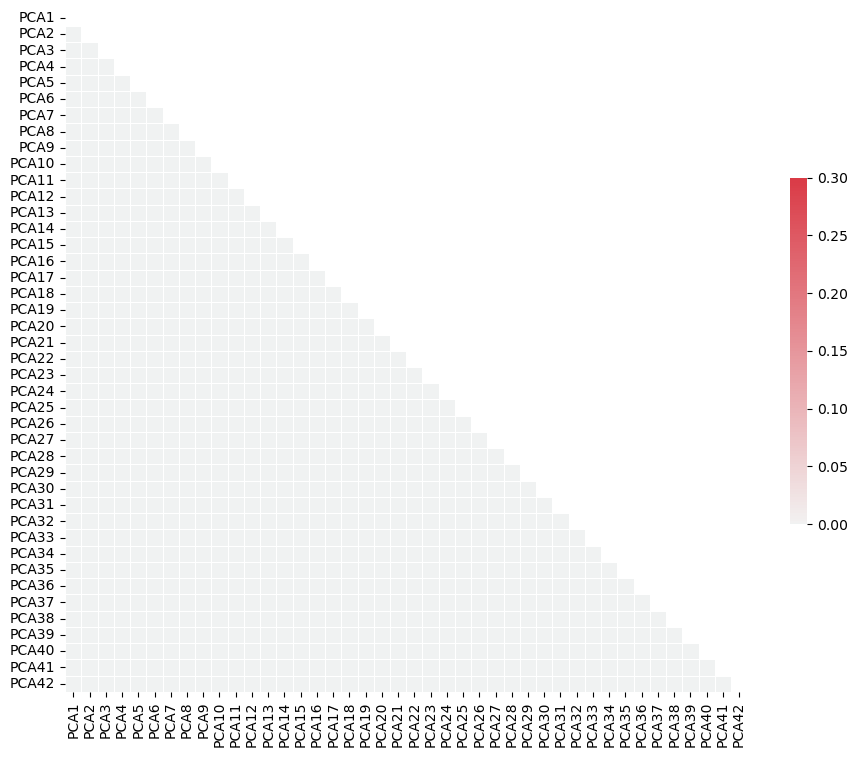

In [25]:
corr = df_pca_X_train.corr()

mask = np.zeros_like(corr, dtype=bool) 
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# XGBoost

After processing these data, first using XGBoost to get the model and make prediction

In [26]:
import xgboost as xgb

In [27]:
xgb_reg=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=42)
xgb_reg.fit(balance_X_train,balance_Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
xgb_pred=xgb_reg.predict(std_X_test)
xgb_pred_valid=xgb_reg.predict(std_X_valid)
y_test=Y_test.values.ravel()
y_valid=Y_valid.values.ravel()
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,xgb_pred))
print("\nClassification Report:test set")
print(classification_report(y_test, xgb_pred))
print("\nClassification Report:validation set")
print(classification_report(y_valid, xgb_pred_valid))


Confusion Matrix:
[[1169   23]
 [  18   18]]

Classification Report:test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1192
           1       0.44      0.50      0.47        36

    accuracy                           0.97      1228
   macro avg       0.71      0.74      0.73      1228
weighted avg       0.97      0.97      0.97      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1187
           1       0.57      0.42      0.49        40

    accuracy                           0.97      1227
   macro avg       0.77      0.71      0.74      1227
weighted avg       0.97      0.97      0.97      1227



In [72]:
xgb_proba_test = xgb_reg.predict_proba(std_X_test)[:, 1]
xgb_proba_valid = xgb_reg.predict_proba(std_X_valid)[:, 1]
auc_test = roc_auc_score(y_test, xgb_proba_test)
auc_valid = roc_auc_score(y_valid, xgb_proba_valid)
print(f"Test Set AUC: {auc_test:.4f}")
print(f"Validation Set AUC: {auc_valid:.4f}")

Test Set AUC: 0.9559
Validation Set AUC: 0.9236


# XGBoost selected feature

In [29]:
feature_importance = pd.DataFrame({
    'feature': balance_X_train.columns,
    'importance': xgb_reg.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance.head()

feature  importance
39                               Borrowing dependency    0.289242
18            Persistent EPS in the Last Four Seasons    0.110032
2    ROA(B) before interest and depreciation after...    0.031195
8         Non-industry income and expenditure/revenue    0.029854
88                 Net Income to Stockholder's Equity    0.028941

<Figure size 1200x800 with 0 Axes>

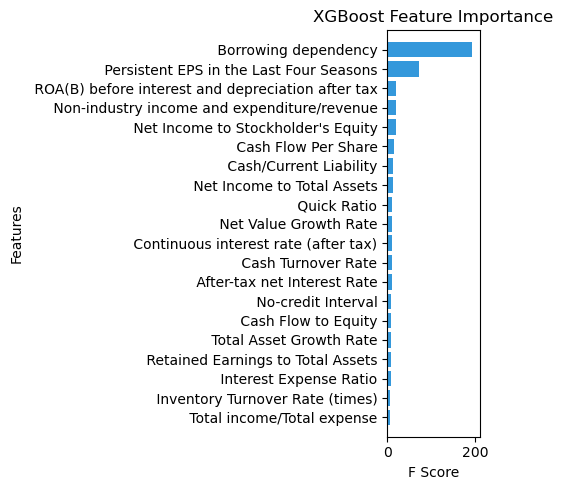

In [117]:
from xgboost import plot_importance
plt.figure(figsize=(12, 8))  
plot_importance(
    xgb_reg,
    importance_type='gain',  
    max_num_features=20,       
    height=0.8,              
    color='#3498db',       
    grid=False,               
    title='XGBoost Feature Importance',
    xlabel='F Score', 
    show_values=False        
)
plt.tight_layout()  
plt.show()

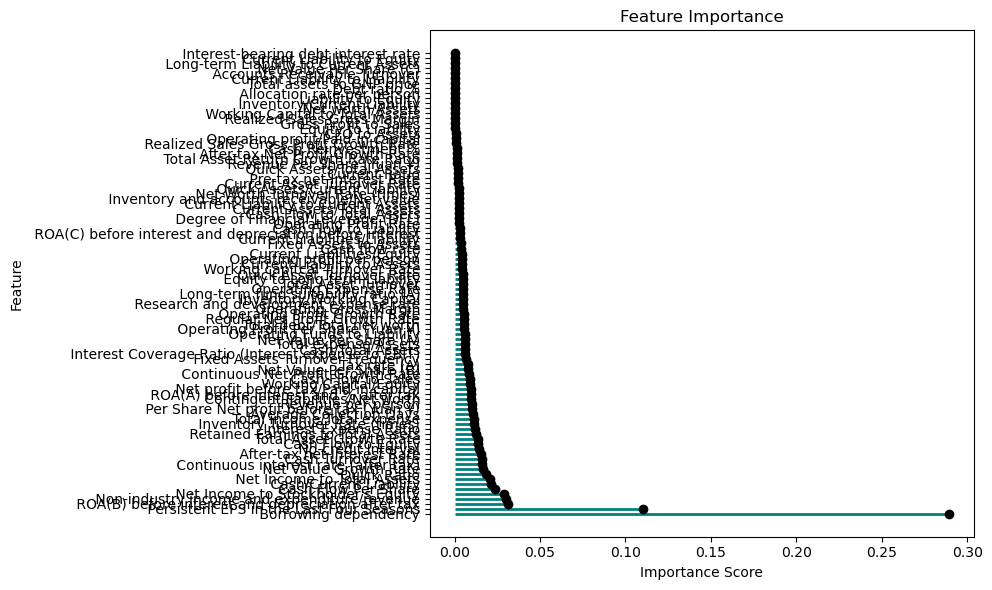

In [31]:
plt.figure(figsize=(10, 6))
plt.hlines(
    y=feature_importance['feature'], 
    xmin=0, 
    xmax=feature_importance['importance'], 
    color='teal',
    linewidth=2
)
plt.plot(feature_importance['importance'], feature_importance['feature'], 'o', color='black')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

<Axes: >

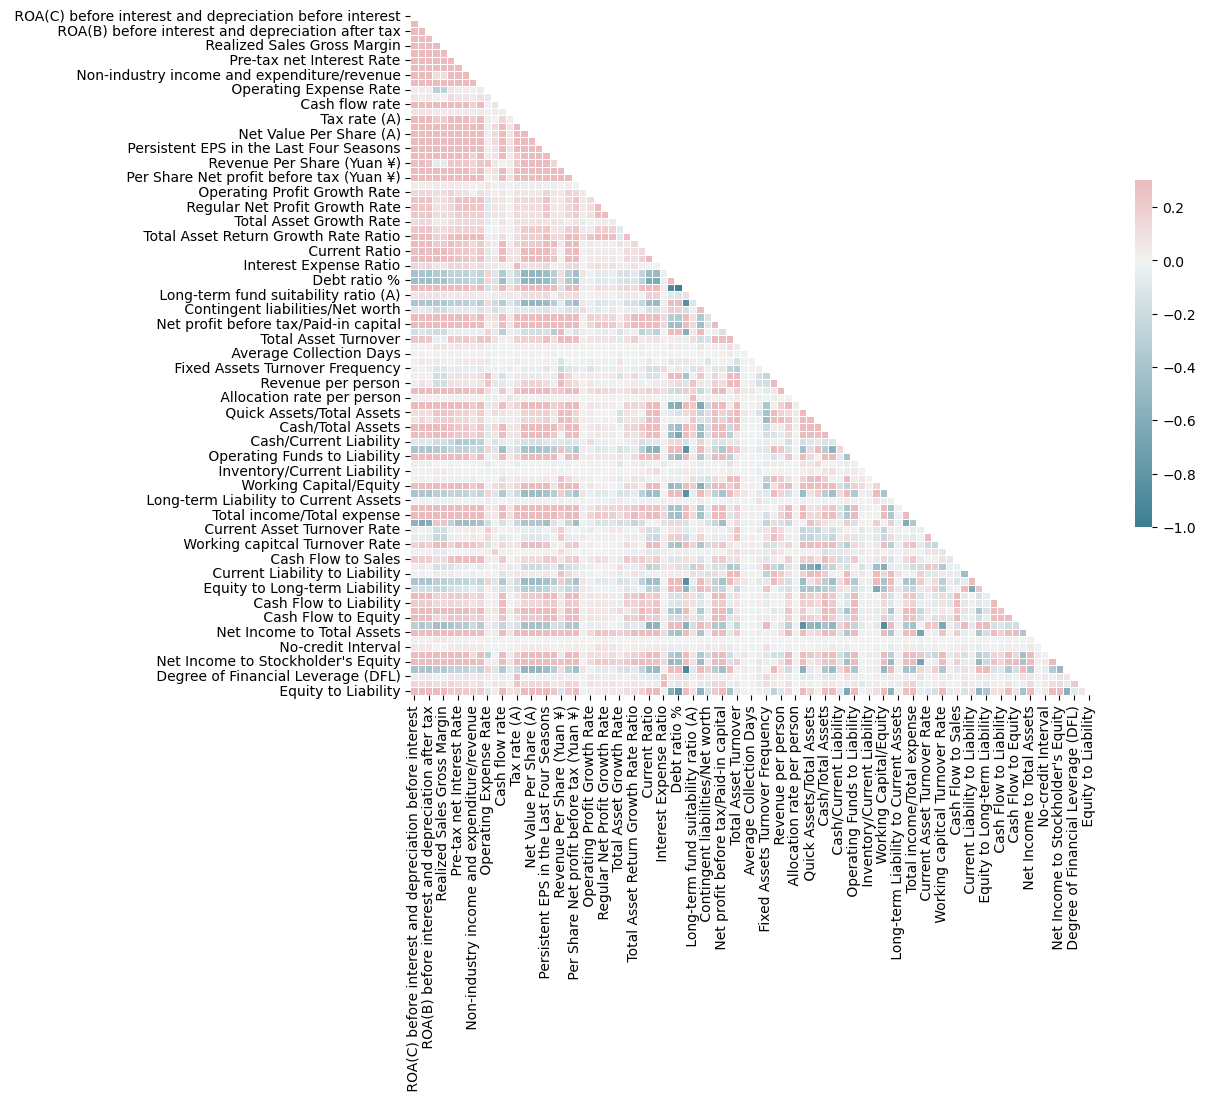

In [32]:
corr = balance_X_train.corr()

mask = np.zeros_like(corr, dtype=bool) 
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the XGBoost model we can get columns feature importance and we can also see there are some highly correlated columns in our data.

Therefore I select the feature which have a higher importance than 0.001 and if they have a highly correlated column, keep the higher importance columns

And after selecting feather, there are 53 columns now.

In [33]:
high_importance = feature_importance[feature_importance['importance'] > 0.001]
high_importance = high_importance.sort_values('importance', ascending=False)
selected_features = []
for feat in high_importance['feature']:
    correlated = False
    for selected_feat in selected_features:
        if abs(corr.loc[feat, selected_feat]) > 0.8:
            correlated = True
            break
    if not correlated:
        selected_features.append(feat)
print(len(selected_features))
selected_features

53


[' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Non-industry income and expenditure/revenue',
 ' Cash Flow Per Share',
 ' Cash/Current Liability',
 ' Quick Ratio',
 ' Net Value Growth Rate',
 ' Continuous interest rate (after tax)',
 ' Cash Turnover Rate',
 ' No-credit Interval',
 ' Cash Flow to Equity',
 ' Total Asset Growth Rate',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' Inventory Turnover Rate (times)',
 ' Total income/Total expense',
 ' Average Collection Days',
 ' Revenue per person',
 ' Contingent liabilities/Net worth',
 ' Working Capital/Equity',
 ' Cash Flow to Sales',
 ' Continuous Net Profit Growth Rate',
 ' Net Value Per Share (B)',
 ' Tax rate (A)',
 ' Fixed Assets Turnover Frequency',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Cash/Total Assets',
 ' Total expense/Assets',
 ' Operating Funds to Liability',
 ' Regular Net Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Operating Gross Margin',


Use the data with selected feature to make a new XGBoost model

In [34]:
#selected_features=feature_importance["feature"].head(70).tolist()
xgb_X_train=balance_X_train[selected_features]
xgb_X_test=std_X_test[selected_features]
xgb_X_valid=std_X_valid[selected_features]
xgb_reg_2=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=100)
xgb_reg_2.fit(xgb_X_train,balance_Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

array([[<Axes: title={'center': ' Borrowing dependency'}>,
        <Axes: title={'center': ' Persistent EPS in the Last Four Seasons'}>,
        <Axes: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <Axes: title={'center': ' Cash Flow Per Share'}>,
        <Axes: title={'center': ' Cash/Current Liability'}>,
        <Axes: title={'center': ' Quick Ratio'}>,
        <Axes: title={'center': ' Net Value Growth Rate'}>],
       [<Axes: title={'center': ' Continuous interest rate (after tax)'}>,
        <Axes: title={'center': ' Cash Turnover Rate'}>,
        <Axes: title={'center': ' No-credit Interval'}>,
        <Axes: title={'center': ' Cash Flow to Equity'}>,
        <Axes: title={'center': ' Total Asset Growth Rate'}>,
        <Axes: title={'center': ' Retained Earnings to Total Assets'}>,
        <Axes: title={'center': ' Interest Expense Ratio'}>],
       [<Axes: title={'center': ' Inventory Turnover Rate (times)'}>,
        <Axes: title={'center': ' Tota

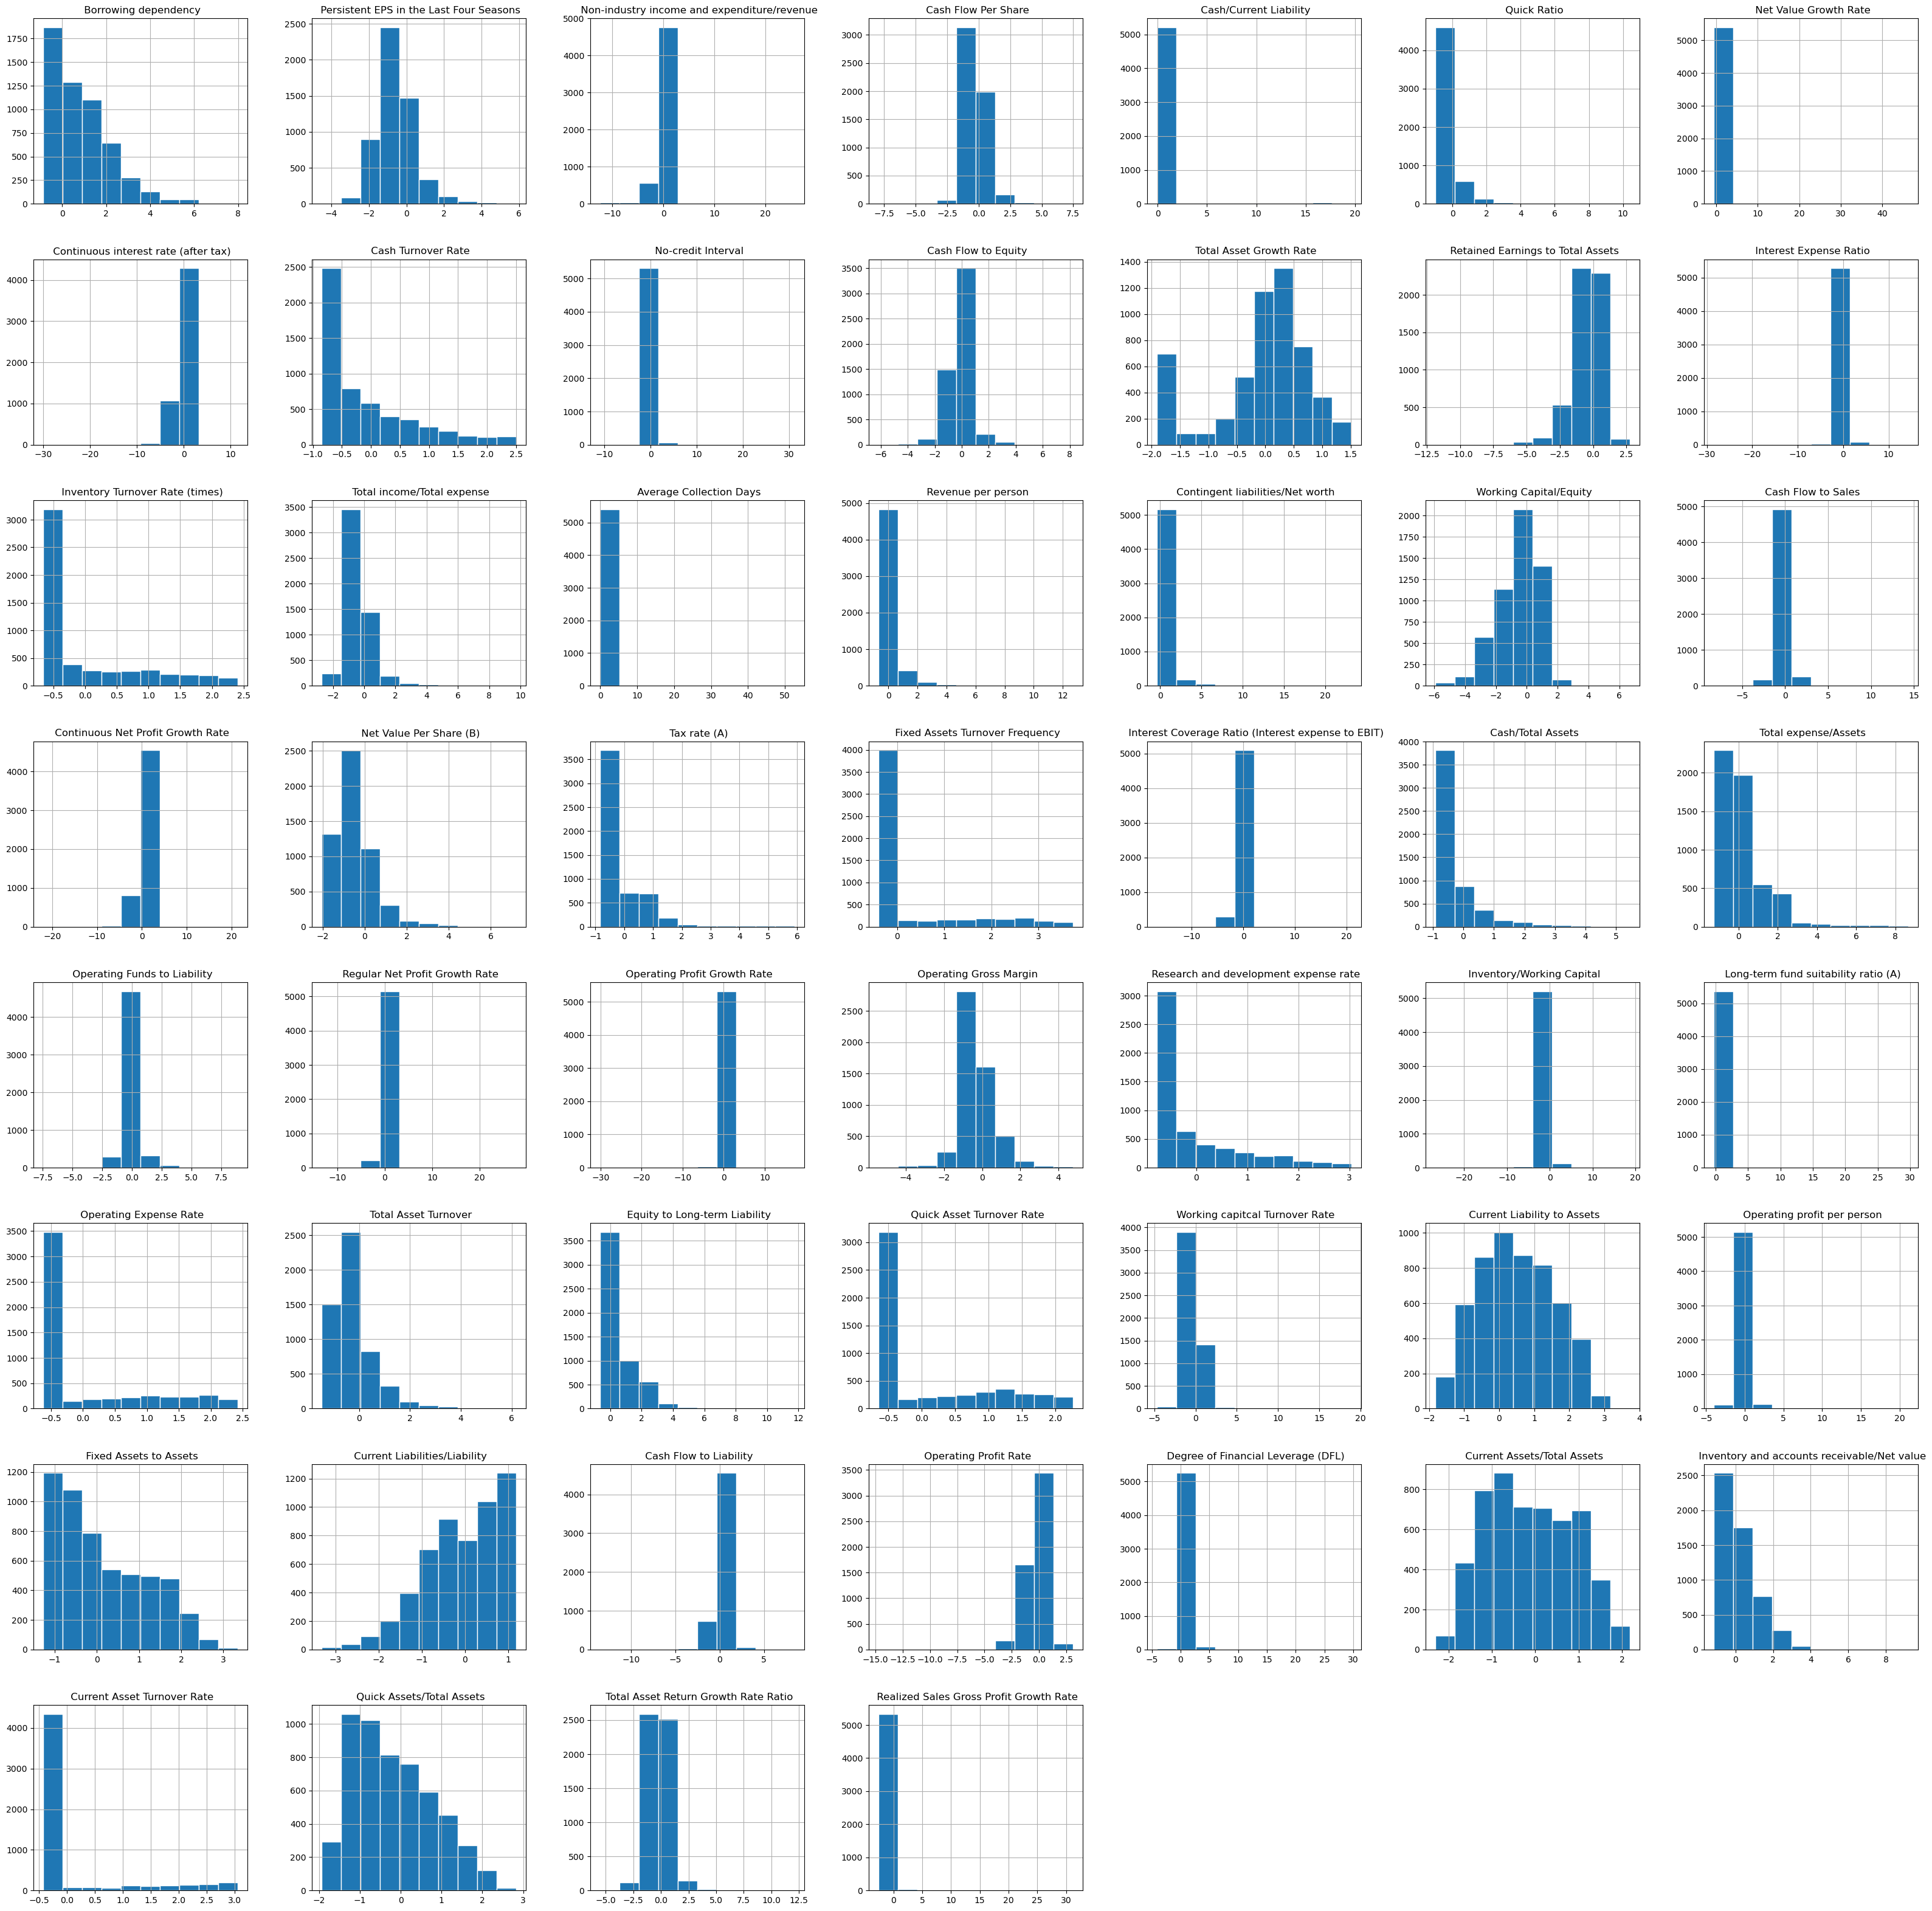

In [35]:
xgb_X_train.hist(figsize=(40,40), edgecolor='white')

In [36]:
xgb_pred_2=xgb_reg_2.predict(xgb_X_test)
xgb_pred_2_valid=xgb_reg_2.predict(xgb_X_valid)
y_test=Y_test.values.ravel()
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,xgb_pred_2))
print("\nClassification Report:test set")
print(classification_report(y_test, xgb_pred_2))
print("\nClassification Report:validation set")
print(classification_report(y_valid, xgb_pred_2_valid))


Confusion Matrix:
[[1172   20]
 [  17   19]]

Classification Report:test set
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1192
           1       0.49      0.53      0.51        36

    accuracy                           0.97      1228
   macro avg       0.74      0.76      0.75      1228
weighted avg       0.97      0.97      0.97      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1187
           1       0.57      0.40      0.47        40

    accuracy                           0.97      1227
   macro avg       0.78      0.69      0.73      1227
weighted avg       0.97      0.97      0.97      1227



In [73]:
xgb_proba_test_2 = xgb_reg_2.predict_proba(xgb_X_test)[:, 1]
xgb_proba_valid_2 = xgb_reg_2.predict_proba(xgb_X_valid)[:, 1]
auc_test_2 = roc_auc_score(y_test, xgb_proba_test_2)
auc_valid_2 = roc_auc_score(y_valid, xgb_proba_valid_2)
print(f"Test Set AUC: {auc_test_2:.4f}")
print(f"Validation Set AUC: {auc_valid_2:.4f}")

Test Set AUC: 0.9597
Validation Set AUC: 0.9202


In [37]:
feature_importance_2 = pd.DataFrame({
    'feature': xgb_X_train.columns,
    'importance': xgb_reg_2.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_2.head()

feature  importance
0                           Borrowing dependency    0.275571
1        Persistent EPS in the Last Four Seasons    0.112750
4                         Cash/Current Liability    0.041748
2    Non-industry income and expenditure/revenue    0.031359
16                       Average Collection Days    0.027125

In [38]:
Y=balance_Y_train.values.ravel()
y_test=Y_test.values.ravel()

# XGBoost optimal hyper parameter

## find the optimal hyper parameter with selected features dataset

In [39]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [40]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 20),
        'random_state': 42,
        'early_stopping_rounds': 50 
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    thresholds = []

    for train_idx, valid_idx in cv.split(xgb_X_train, balance_Y_train_num):
        X_tr = xgb_X_train.iloc[train_idx]
        y_tr = balance_Y_train_num[train_idx]
        X_val = xgb_X_train.iloc[valid_idx]
        y_val = balance_Y_train_num[valid_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        proba = model.predict_proba(X_val)
        class1_proba = proba[:, 1] if proba.shape[1] > 1 else proba[:, 0]
        
        best_f1, best_thresh = 0, 0.5
        for thresh in np.linspace(0.1, 0.9, 50):
            preds = (class1_proba >= thresh).astype(int)
            if len(np.unique(preds)) >= 2:
                current_f1 = f1_score(y_val, preds, pos_label=1)
                if current_f1 > best_f1:
                    best_f1, best_thresh = current_f1, thresh

        f1_scores.append(best_f1)
        thresholds.append(best_thresh)

    trial.set_user_attr('best_threshold', np.mean(thresholds))
    return np.mean(f1_scores)

In [41]:
balance_Y_train_num=balance_Y_train.values.ravel()
balance_Y_train_num

array([1, 0, 0, ..., 1, 1, 1])

In [42]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

[I 2025-03-24 17:34:57,194] A new study created in memory with name: no-name-1f327bc8-c894-4122-aa3c-2237fed74356


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-03-24 17:35:03,610] Trial 0 finished with value: 0.9842964165795083 and parameters: {'n_estimators': 921, 'learning_rate': 0.06335576545672379, 'max_depth': 7, 'subsample': 0.7974727840470333, 'colsample_bytree': 0.9937106221000105, 'gamma': 9.19539763349984, 'min_child_weight': 2, 'reg_alpha': 1.8517311838470085, 'reg_lambda': 4.901713040228039, 'scale_pos_weight': 12.304228815783159}. Best is trial 0 with value: 0.9842964165795083.
[I 2025-03-24 17:35:08,826] Trial 1 finished with value: 0.9709648795493706 and parameters: {'n_estimators': 163, 'learning_rate': 0.012199595926055337, 'max_depth': 12, 'subsample': 0.5479231090861847, 'colsample_bytree': 0.7666873134180847, 'gamma': 0.10855113726996102, 'min_child_weight': 7, 'reg_alpha': 7.5287054706152094, 'reg_lambda': 0.19445392573564035, 'scale_pos_weight': 11.865790136896907}. Best is trial 0 with value: 0.9842964165795083.
[I 2025-03-24 17:35:12,708] Trial 2 finished with value: 0.9900896906570619 and parameters: {'n_estim

In [118]:
study.best_params

{'n_estimators': 925,
 'learning_rate': 0.041900990939975666,
 'max_depth': 7,
 'subsample': 0.7776671058077844,
 'colsample_bytree': 0.9956822074060958,
 'gamma': 0.5237791286379531,
 'min_child_weight': 2,
 'reg_alpha': 5.851499496921263,
 'reg_lambda': 4.870307921493235,
 'scale_pos_weight': 8.428093714428087}

## apply optimal parameter to XGBoost model

In [43]:
final_model = xgb.XGBClassifier(
    **study.best_params,
    early_stopping_rounds=50 
)

In [44]:
'''xgb_X_train=balance_X_train[selected_features]
xgb_X_test=std_X_test[selected_features]
xgb_X_valid=std_X_valid[selected_features]
xgb_reg_2=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=100)
xgb_reg_2.fit(xgb_X_train,balance_Y_train)'''

"xgb_X_train=balance_X_train[selected_features]\nxgb_X_test=std_X_test[selected_features]\nxgb_X_valid=std_X_valid[selected_features]\nxgb_reg_2=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=100)\nxgb_reg_2.fit(xgb_X_train,balance_Y_train)"

In [45]:
final_model.fit(
    xgb_X_train, balance_Y_train,
    eval_set=[(xgb_X_valid, y_valid)], 
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9956822074060958, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.5237791286379531, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.041900990939975666,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=925, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
def safe_predict(model, X, threshold=0.5):
    proba = model.predict_proba(X)
    if proba.shape[1] == 1:
        return np.zeros(X.shape[0], dtype=int)
    return (proba[:, 1] >= threshold).astype(int)

In [47]:
optimal_threshold = study.user_attrs.get('best_threshold', 0.5)

test_pred = safe_predict(final_model, xgb_X_test, optimal_threshold)
valid_pred = safe_predict(final_model, xgb_X_valid, optimal_threshold)

print(study.best_params)
print(f"optimal threshold: {optimal_threshold:.4f}")
print(f"best F1-score: {study.best_value:.4f}")

print("Confusion matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nClassification report:test set")
print(classification_report(y_test, test_pred, target_names=['Non-Bankrupt', 'Bankrupt']))

print("\nClassification report:validation set")
print(classification_report(y_valid, valid_pred))

{'n_estimators': 925, 'learning_rate': 0.041900990939975666, 'max_depth': 7, 'subsample': 0.7776671058077844, 'colsample_bytree': 0.9956822074060958, 'gamma': 0.5237791286379531, 'min_child_weight': 2, 'reg_alpha': 5.851499496921263, 'reg_lambda': 4.870307921493235, 'scale_pos_weight': 8.428093714428087}
optimal threshold: 0.5000
best F1-score: 0.9930
Confusion matrix:
[[1140   52]
 [   9   27]]

Classification report:test set
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.96      0.97      1192
    Bankrupt       0.34      0.75      0.47        36

    accuracy                           0.95      1228
   macro avg       0.67      0.85      0.72      1228
weighted avg       0.97      0.95      0.96      1228


Classification report:validation set
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1187
           1       0.43      0.70      0.53        40

    accuracy                           0

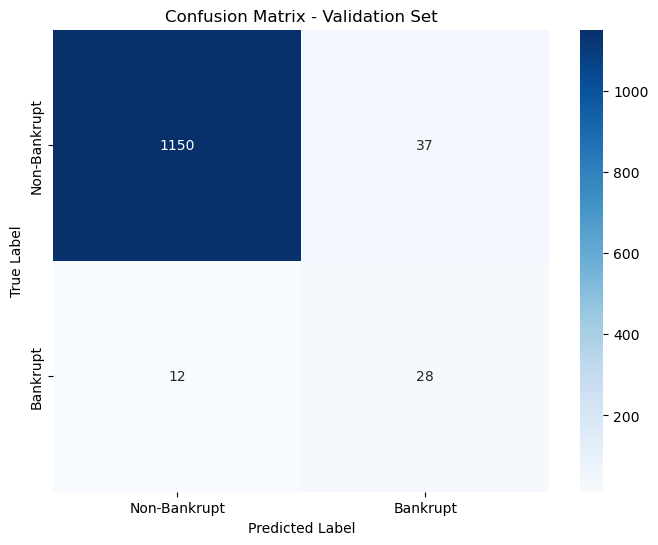

In [119]:
conf_matrix_valid = confusion_matrix(y_valid, valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Bankrupt', 'Bankrupt'], 
            yticklabels=['Non-Bankrupt', 'Bankrupt'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [74]:
xgb_proba_test_optimal = final_model.predict_proba(xgb_X_test)[:, 1]
xgb_proba_valid_optimal = final_model.predict_proba(xgb_X_valid)[:, 1]
auc_test_optimal = roc_auc_score(y_test, xgb_proba_test_optimal)
auc_valid_optimal = roc_auc_score(y_valid, xgb_proba_valid_optimal)
print(f"Test Set AUC: {auc_test_optimal:.4f}")
print(f"Validation Set AUC: {auc_valid_optimal:.4f}")

Test Set AUC: 0.9501
Validation Set AUC: 0.9246


<Figure size 2000x2000 with 0 Axes>

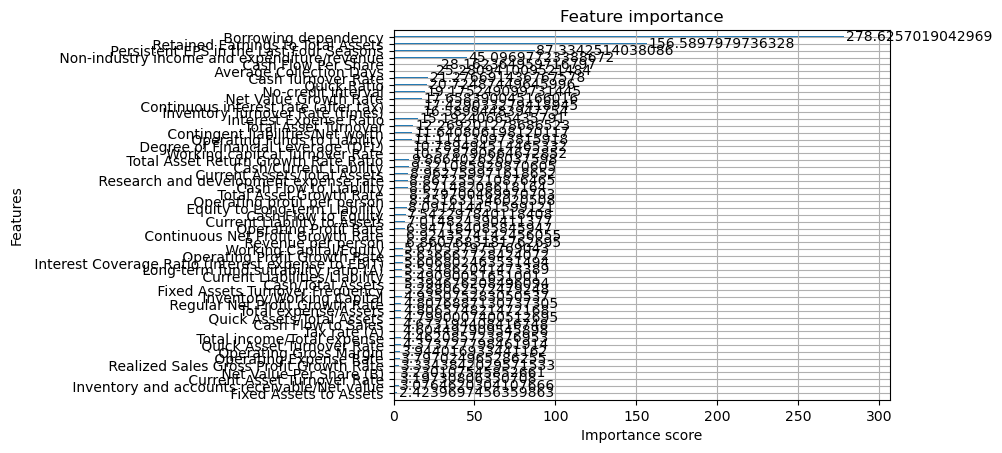

In [48]:
plt.figure(figsize=(20, 20))
plot_importance(final_model, importance_type='gain')
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

# Optimal parameter selected feature

When we get the optimal hyper parameter, we can use that model to get a new feather importance and select it again to run another XGBoost model to see if there are some improvement.

In [49]:
feature_importance_optimal = pd.DataFrame({
    'feature': xgb_X_train.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_optimal.head()

feature  importance
0                           Borrowing dependency    0.275671
12             Retained Earnings to Total Assets    0.154929
1        Persistent EPS in the Last Four Seasons    0.086408
2    Non-industry income and expenditure/revenue    0.044619
3                            Cash Flow Per Share    0.027864

In [50]:
selected_features_optimal = feature_importance_optimal[feature_importance_optimal['importance'] > 0.001]
selected_features_optimal = selected_features_optimal.sort_values('importance', ascending=False)
selected_features_optimal

feature  importance
0                                Borrowing dependency    0.275671
12                  Retained Earnings to Total Assets    0.154929
1             Persistent EPS in the Last Four Seasons    0.086408
2         Non-industry income and expenditure/revenue    0.044619
3                                 Cash Flow Per Share    0.027864
16                            Average Collection Days    0.025013
8                                  Cash Turnover Rate    0.021051
5                                         Quick Ratio    0.020505
9                                  No-credit Interval    0.018972
6                               Net Value Growth Rate    0.017471
7                Continuous interest rate (after tax)    0.017244
14                    Inventory Turnover Rate (times)    0.016414
13                             Interest Expense Ratio    0.015031
36                               Total Asset Turnover    0.012139
18                   Contingent liabilities/Net worth    0.011517
28                       Operating Funds to Liability    0.010996
46                 Degree of Financial Leverage (DFL)    0.010675
39                     Working capitcal Turnover Rate    0.010467
51               Total Asset Return Growth Rate Ratio    0.009762
4                              Cash/Current Liability    0.009222
47                        Current Assets/Total Assets    0.008868
32              Research and development expense rate    0.008773
44                             Cash Flow to Liability    0.008580
11                            Total Asset Growth Rate    0.008489
41                        Operating profit per person    0.008362
37                      Equity to Long-term Liability    0.008006
10                                Cash Flow to Equity    0.007462
40                        Current Liability to Assets    0.006940
45                              Operating Profit Rate    0.006874
21                  Continuous Net Profit Growth Rate    0.006851
17                                 Revenue per person    0.006788
19                             Working Capital/Equity    0.005610
30                       Operating Profit Growth Rate    0.005577
25   Interest Coverage Ratio (Interest expense to ...    0.005547
34               Long-term fund suitability ratio (A)    0.005476
43                      Current Liabilities/Liability    0.005433
26                                  Cash/Total Assets    0.005337
24                    Fixed Assets Turnover Frequency    0.005232
33                          Inventory/Working Capital    0.004883
29                     Regular Net Profit Growth Rate    0.004757
27                               Total expense/Assets    0.004756
50                          Quick Assets/Total Assets    0.004748
20                                 Cash Flow to Sales    0.004624
23                                       Tax rate (A)    0.004556
15                         Total income/Total expense    0.004415
38                          Quick Asset Turnover Rate    0.004327
31                             Operating Gross Margin    0.003902
35                             Operating Expense Rate    0.003757
52            Realized Sales Gross Profit Growth Rate    0.003299
22                            Net Value Per Share (B)    0.003196
49                        Current Asset Turnover Rate    0.003163
48        Inventory and accounts receivable/Net value    0.003044
42                             Fixed Assets to Assets    0.002398

In [51]:
#selected_features=feature_importance["feature"].head(70).tolist()
xgb_X_train_optimal=balance_X_train[selected_features_optimal["feature"]]
xgb_X_test_optimal=std_X_test[selected_features_optimal["feature"]]
xgb_X_valid_optimal=std_X_valid[selected_features_optimal["feature"]]
#xgb_reg_2_optimal=xgb.XGBClassifier( **study.best_params,early_stopping_rounds=50)
xgb_reg_2_optimal=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=42)
xgb_reg_2_optimal.fit(xgb_X_train_optimal,balance_Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
xgb_pred_2_test_optimal=xgb_reg_2_optimal.predict(xgb_X_test_optimal)
xgb_pred_2_valid_optimal=xgb_reg_2_optimal.predict(xgb_X_valid_optimal)
print("\nClassification Report:test set")
print(classification_report(y_test, xgb_pred_2_test_optimal))
print("\nClassification Report:validation set")
print(classification_report(y_valid, xgb_pred_2_valid_optimal))


Classification Report:test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1192
           1       0.47      0.50      0.49        36

    accuracy                           0.97      1228
   macro avg       0.73      0.74      0.74      1228
weighted avg       0.97      0.97      0.97      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1187
           1       0.66      0.47      0.55        40

    accuracy                           0.97      1227
   macro avg       0.82      0.73      0.77      1227
weighted avg       0.97      0.97      0.97      1227



In [75]:
xgb_proba_test_optimal_2 = xgb_reg_2_optimal.predict_proba(xgb_X_test_optimal)[:, 1]
xgb_proba_valid_optimal_2 = xgb_reg_2_optimal.predict_proba(xgb_X_valid_optimal)[:, 1]
auc_test_optimal_2 = roc_auc_score(y_test, xgb_proba_test_optimal_2)
auc_valid_optimal_2 = roc_auc_score(y_valid, xgb_proba_valid_optimal_2)
print(f"Test Set AUC: {auc_test_optimal_2:.4f}")
print(f"Validation Set AUC: {auc_valid_optimal_2:.4f}")

Test Set AUC: 0.9565
Validation Set AUC: 0.9264


# PCA+XGBoost+optimal parameter

In [53]:
#xgb_reg_pca=xgb.XGBClassifier(**study.best_params)
xgb_reg_pca=xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,random_state=42)
xgb_reg_pca.fit(df_pca_X_train,balance_Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

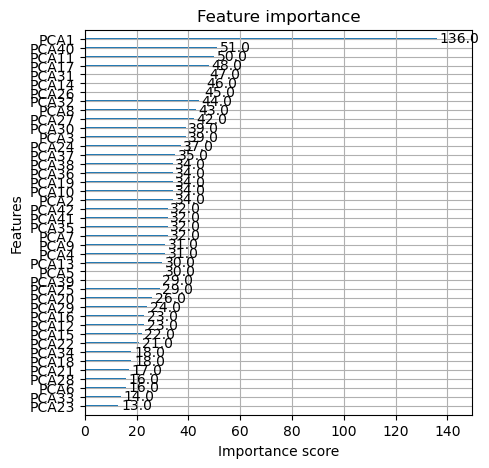

In [54]:
plot_importance(xgb_reg_pca, importance_type='weight')
plt.show()

In [55]:
xgb_pred_pca_valid=xgb_reg_pca.predict(pca_X_valid)
xgb_pred_pca_test=xgb_reg_pca.predict(pca_X_test)

In [56]:
print("\nClassification Report:test set")
print(classification_report(y_test, xgb_pred_pca_test))
print("\nClassification Report:validation set")
print(classification_report(y_valid, xgb_pred_pca_valid))


Classification Report:test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1192
           1       0.42      0.39      0.41        36

    accuracy                           0.97      1228
   macro avg       0.70      0.69      0.69      1228
weighted avg       0.97      0.97      0.97      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1187
           1       0.37      0.33      0.35        40

    accuracy                           0.96      1227
   macro avg       0.67      0.65      0.66      1227
weighted avg       0.96      0.96      0.96      1227



In [79]:
xgb_proba_test_pca = xgb_reg_pca.predict_proba(pca_X_test)[:, 1]
xgb_proba_valid_pca = xgb_reg_pca.predict_proba(pca_X_valid)[:, 1]
auc_test_optimal_pca = roc_auc_score(y_test, xgb_proba_test_pca)
auc_valid_optimal_pca = roc_auc_score(y_valid, xgb_proba_valid_pca)
print(f"Test Set AUC: {auc_test_optimal_pca:.4f}")
print(f"Validation Set AUC: {auc_valid_optimal_pca:.4f}")

Test Set AUC: 0.8680
Validation Set AUC: 0.8803


# Support Vector Machine

In [57]:
from sklearn.svm import SVC
liner_svm=SVC(kernel="linear",C=0.1,probability=True)
liner_svm.fit(xgb_X_train,Y)

SVC(C=0.1, kernel='linear', probability=True)

In [80]:
svc_pred=liner_svm.predict(xgb_X_test)
svc_pred_valid=liner_svm.predict(xgb_X_valid)
svc_proba_test=liner_svm.predict_proba(xgb_X_test)[:,1]
svc_proba_valid=liner_svm.predict_proba(xgb_X_valid)[:,1]

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))

Confusion Matrix:
[[1038  154]
 [   6   30]]


In [60]:
print("\nClassification Report:test set")
print(classification_report(y_test, svc_pred))
print("\nClassification Report:validation set")
print(classification_report(y_valid, svc_pred_valid))


Classification Report:test set
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1192
           1       0.16      0.83      0.27        36

    accuracy                           0.87      1228
   macro avg       0.58      0.85      0.60      1228
weighted avg       0.97      0.87      0.91      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1187
           1       0.16      0.70      0.26        40

    accuracy                           0.87      1227
   macro avg       0.58      0.79      0.60      1227
weighted avg       0.96      0.87      0.91      1227



In [81]:
svc_test = roc_auc_score(y_test, svc_proba_test)
svc_valid = roc_auc_score(y_valid, svc_proba_valid)
print(f"Test Set AUC: {auc_test_optimal_pca:.4f}")
print(f"Validation Set AUC: {auc_valid_optimal_pca:.4f}")

Test Set AUC: 0.8680
Validation Set AUC: 0.8803


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [63]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(
        C=0.1,       
        random_state=42,
        loss="hinge"
    ))
])
polynomial_svm_clf.fit(xgb_X_train, Y)

/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=0.1, loss='hinge', random_state=42))])

In [64]:
poly_svc_pred=polynomial_svm_clf.predict(xgb_X_test)
poly_svc_pred_valid=polynomial_svm_clf.predict(xgb_X_valid)
#poly_svc_proba=polynomial_svm_clf.predict_proba(xgb_X_test)[:,1]

In [65]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, poly_svc_pred))

Confusion Matrix:
[[1122   70]
 [  17   19]]


In [66]:
print("\nClassification Report:test set")
print(classification_report(y_test, poly_svc_pred))
print("\nClassification Report:validation set")
print(classification_report(y_valid, poly_svc_pred_valid))


Classification Report:test set
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1192
           1       0.21      0.53      0.30        36

    accuracy                           0.93      1228
   macro avg       0.60      0.73      0.63      1228
weighted avg       0.96      0.93      0.94      1228


Classification Report:validation set
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1187
           1       0.26      0.45      0.33        40

    accuracy                           0.94      1227
   macro avg       0.62      0.70      0.65      1227
weighted avg       0.96      0.94      0.95      1227



# Neural Network

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [68]:
def build_nn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)), 
        Dropout(0.3),                                            
        Dense(64, activation='relu'),                            
        Dropout(0.2),
        Dense(1, activation='sigmoid')                           
    ])
    return model
#input_dim = xgb_X_train.shape[1] 
input_dim = balance_X_train.shape[1] 
nn_model = build_nn_model(input_dim)

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
xgb_X_valid.shape

(1227, 53)

In [70]:
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

history = nn_model.fit(
    #xgb_X_train.values, balance_Y_train.values.ravel(),
    balance_X_train.values, balance_Y_train.values.ravel(), 
    epochs=200,
    batch_size=64,
    validation_data=(#xgb_X_valid.values
       std_X_valid.values , y_valid),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7781 - loss: 0.4525 - precision: 0.7476 - recall: 0.8517 - val_accuracy: 0.8867 - val_loss: 0.4933 - val_precision: 0.1963 - val_recall: 0.8000
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9386 - loss: 0.1999 - precision: 0.9148 - recall: 0.9672 - val_accuracy: 0.9152 - val_loss: 0.6422 - val_precision: 0.2333 - val_recall: 0.7000
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - loss: 0.1449 - precision: 0.9367 - recall: 0.9862 - val_accuracy: 0.9242 - val_loss: 0.8207 - val_precision: 0.2376 - val_recall: 0.6000
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.1113 - precision: 0.9479 - recall: 0.9954 - val_accuracy: 0.9568 - val_loss: 1.0244 - val_precision: 0.3617 - val_recall: 0.4250
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0752 - precision: 0.9680 - recall: 0.9924 - val_accuracy: 0.9527 - val_loss: 1.3122 

In [71]:
nn_pred_test = (nn_model.predict(#xgb_X_test.values
std_X_test.values) > 0.5).astype(int)
nn_pred_valid = (nn_model.predict(#xgb_X_valid.values
std_X_valid.values) > 0.5).astype(int)

print("\n=== Neural Network Evaluation ===")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, nn_pred_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, nn_pred_test, target_names=['Non-Bankrupt', 'Bankrupt']))
print("\nClassification Report (Validation):")
print(classification_report(y_valid, nn_pred_valid))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

=== Neural Network Evaluation ===

Confusion Matrix (Test):
[[1064  128]
 [   6   30]]

Classification Report (Test):
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.89      0.94      1192
    Bankrupt       0.19      0.83      0.31        36

    accuracy                           0.89      1228
   macro avg       0.59      0.86      0.63      1228
weighted avg       0.97      0.89      0.92      1228


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1187
           1       0.20      0.80      0.32        40

    accuracy                           0.89      1227
   macro avg       0.59      0.84      0.63      1227
weighted avg       0.97      0.89      0.92      1227



In [83]:
nn_test_prob = nn_model.predict(std_X_test).ravel() 
nn_valid_prob = nn_model.predict(std_X_valid).ravel()
auc_test_nn = roc_auc_score(y_test, nn_test_prob)
auc_valid_nn = roc_auc_score(y_valid, nn_valid_prob)
print(f"Test Set AUC: {auc_test_nn:.4f}")
print(f"Validation Set AUC: {auc_valid_nn:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Set AUC: 0.8661
Validation Set AUC: 0.8745


# Predict test data using optimal hyper parameter XGBoost

## Preprocessing test data

array([[<Axes: title={'center': ' ROA(C) before interest and depreciation before interest'}>,
        <Axes: title={'center': ' ROA(A) before interest and % after tax'}>,
        <Axes: title={'center': ' ROA(B) before interest and depreciation after tax'}>,
        <Axes: title={'center': ' Operating Gross Margin'}>,
        <Axes: title={'center': ' Realized Sales Gross Margin'}>,
        <Axes: title={'center': ' Operating Profit Rate'}>,
        <Axes: title={'center': ' Pre-tax net Interest Rate'}>,
        <Axes: title={'center': ' After-tax net Interest Rate'}>,
        <Axes: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <Axes: title={'center': ' Continuous interest rate (after tax)'}>],
       [<Axes: title={'center': ' Operating Expense Rate'}>,
        <Axes: title={'center': ' Research and development expense rate'}>,
        <Axes: title={'center': ' Cash flow rate'}>,
        <Axes: title={'center': ' Interest-bearing debt interest rate'}>,
  

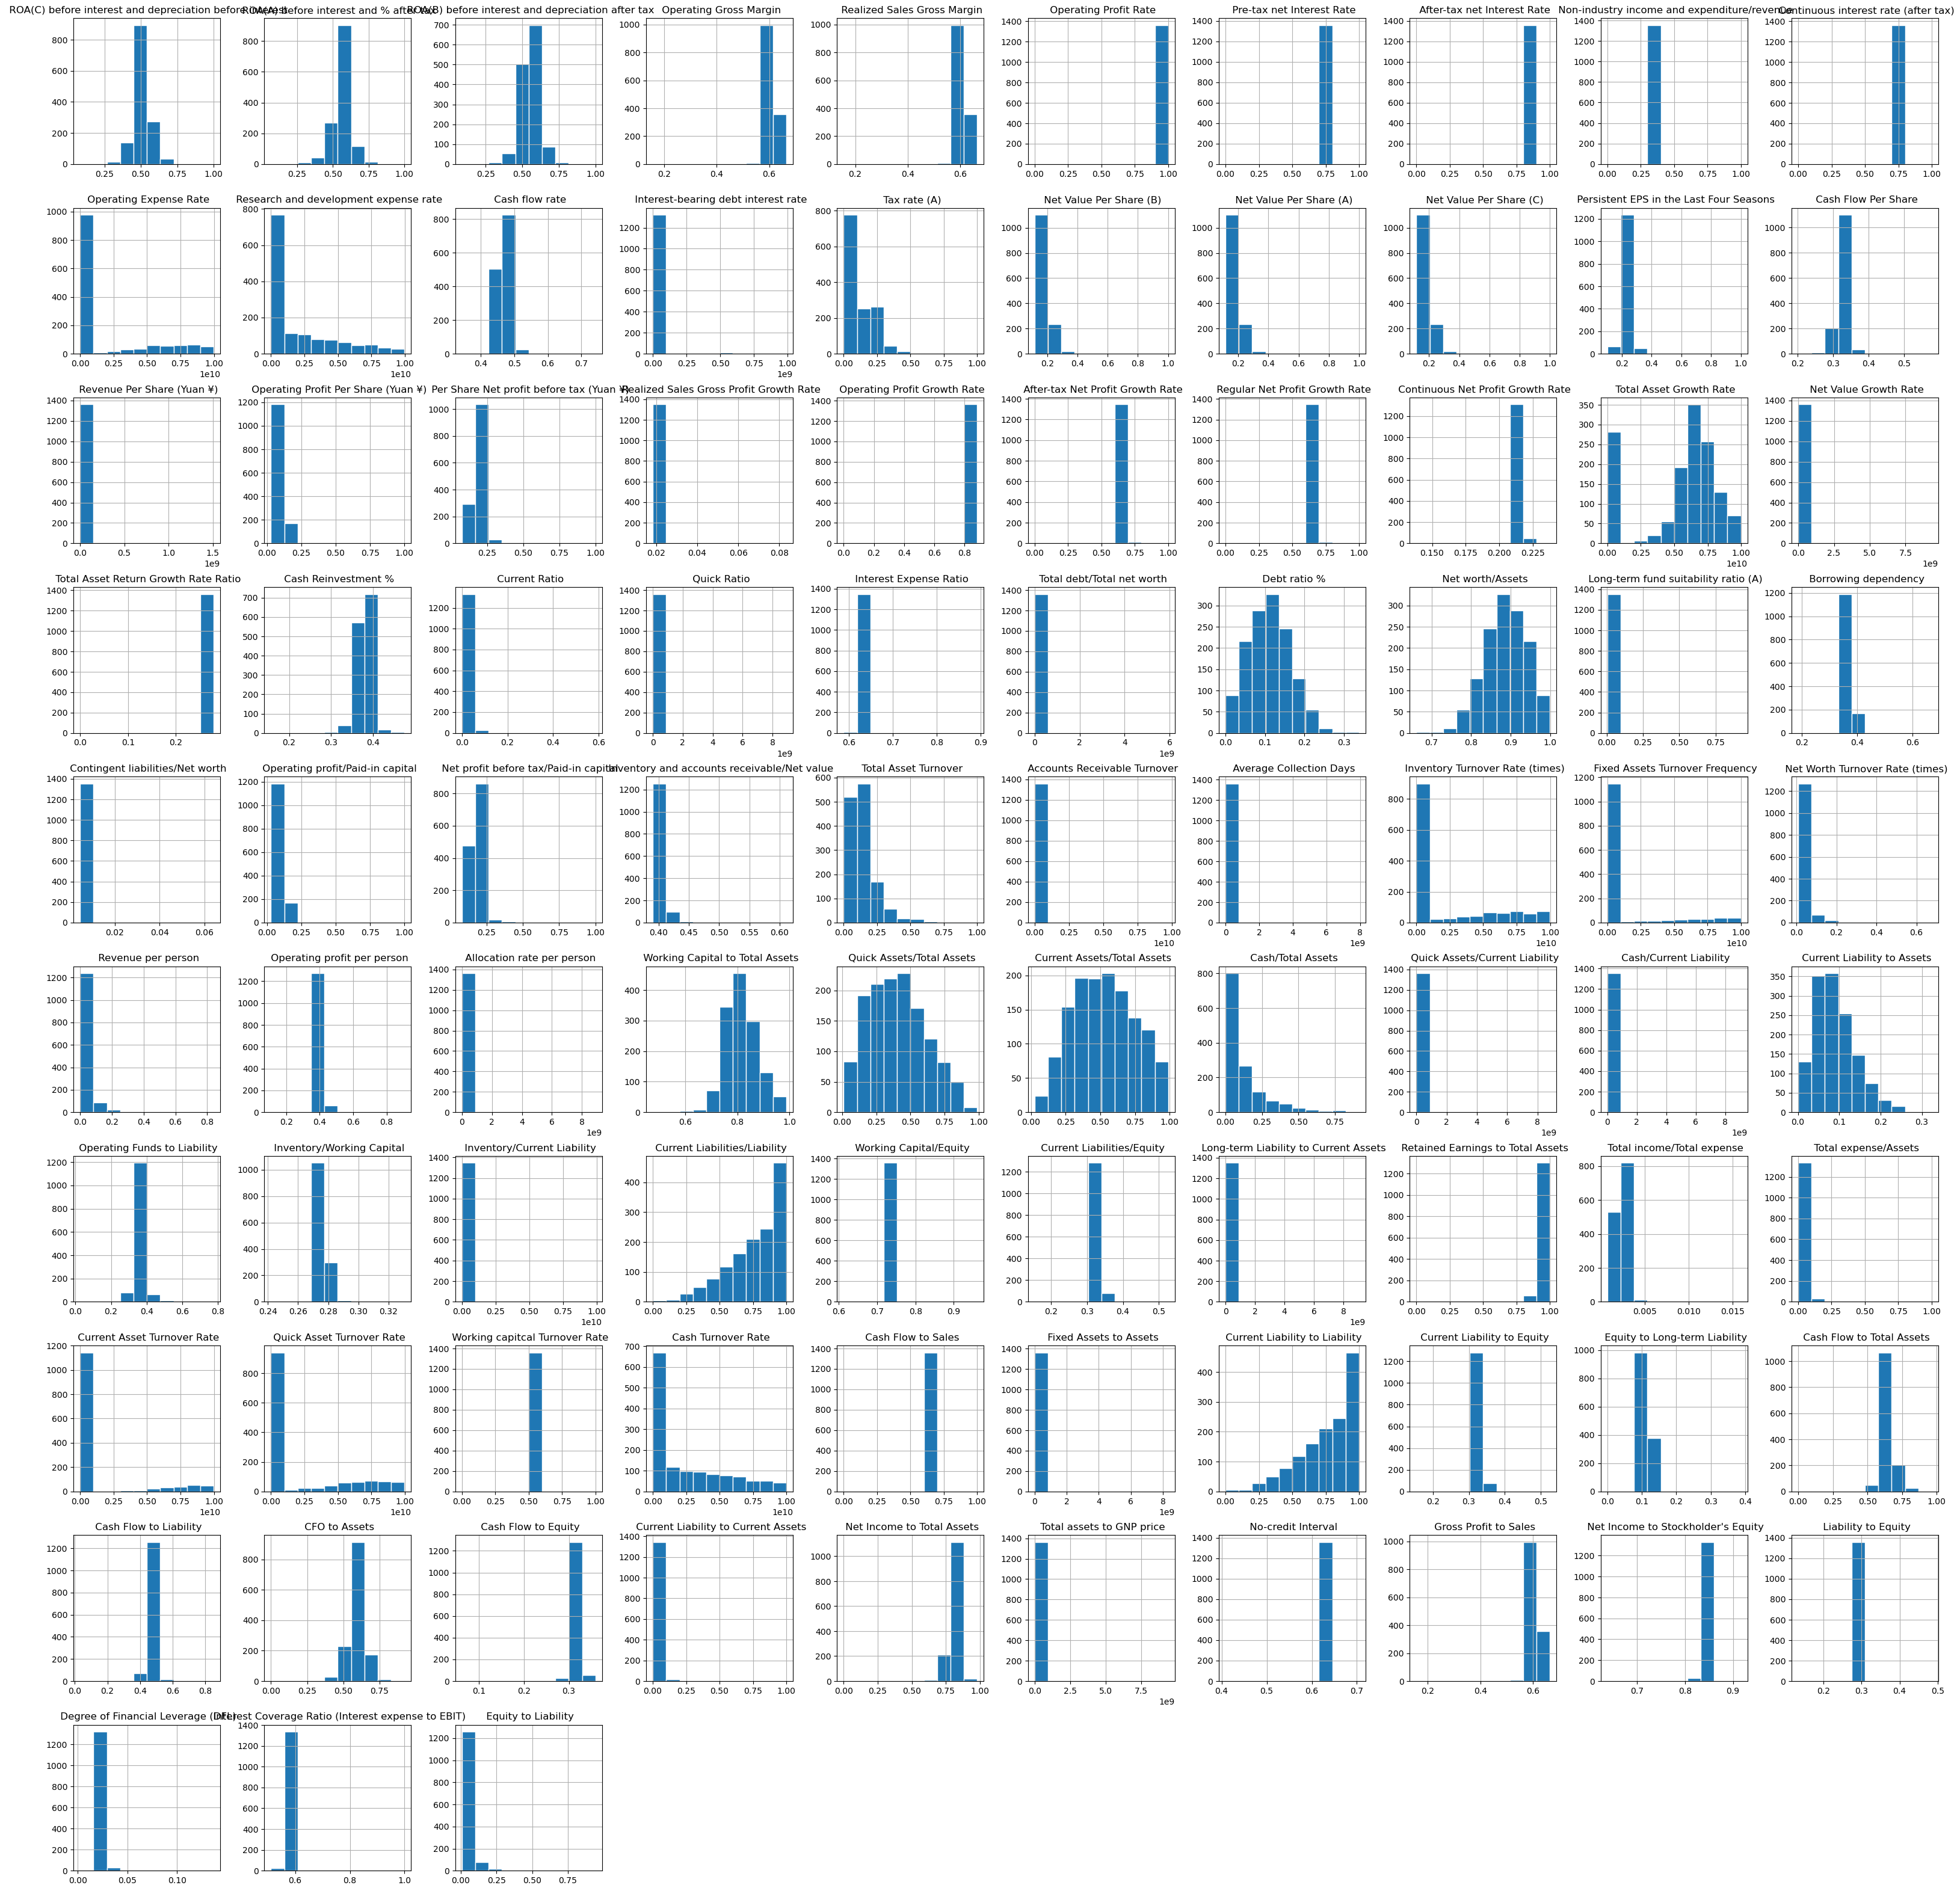

In [89]:
testdata=pd.read_csv("test.csv")
testdata=testdata.iloc[:,1:]
testdata=testdata.drop(columns=[" Net Income Flag"," Liability-Assets Flag"])
testdata.hist(figsize=(40,40), edgecolor='white')

## Standard

In [112]:
print("Real test shape:",testdata.shape)
print("test shape:",X_test.shape)
print("validation shape:",X_valid.shape)

Real test shape: (1364, 93)
test shape: (1228, 93)
validation shape: (1227, 93)


In [87]:
std_testdata_num=scaler.transform(testdata)
std_testdata=pd.DataFrame(std_testdata_num,columns=testdata.columns)
std_testdata.describe()

ROA(C) before interest and depreciation before interest  \
count                                        1364.000000         
mean                                           -0.016277         
std                                             1.171349         
min                                            -7.885777         
25%                                            -0.556890         
50%                                            -0.099839         
75%                                             0.563440         
max                                             9.150292         

       ROA(A) before interest and % after tax  \
count                             1364.000000   
mean                                -0.038926   
std                                  1.191158   
min                                 -8.760552   
25%                                 -0.454386   
50%                                 -0.035378   
75%                                  0.508095   
max                                  7.808592   

       ROA(B) before interest and depreciation after tax  \
count                                        1364.000000   
mean                                           -0.017455   
std                                             1.179059   
min                                            -8.686181   
25%                                            -0.518183   
50%                                            -0.068659   
75%                                             0.549933   
max                                             8.248517   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             1364.000000                  1364.000000   
mean                 0.001548                     0.002126   
std                  1.605766                     1.605885   
min                -37.827412                   -37.894518   
25%                 -0.615146                    -0.613708   
50%                 -0.131776                    -0.128843   
75%                  0.573064                     0.569888   
max                  4.780376                     4.791752   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            1364.000000                1364.000000   
mean               -6.027413                  -2.897198   
std               156.311174                  80.570465   
min             -5379.413033               -2277.685214   
25%                -0.279495                  -0.206505   
50%                 0.023354                   0.017136   
75%                 0.438042                   0.351710   
max                 3.318145                 578.502428   

       After-tax net Interest Rate  \
count                  1364.000000   
mean                     -3.571219   
std                      98.312097   
min                   -2661.320585   
25%                      -0.175929   
50%                       0.037912   
75%                       0.359744   
max                     626.842225   

       Non-industry income and expenditure/revenue  \
count                                  1364.000000   
mean                                      1.334170   
std                                      55.349618   
min                                    -711.433304   
25%                                      -0.167489   
50%                                      -0.024732   
75%                                       0.109386   
max                                    1632.372758   

       Continuous interest rate (after tax)  ...  \
count                           1364.000000  ...   
mean                              -2.555313  ...   
std                               74.197286  ...   
min                            -2059.889992  ...   
25%                               -0.138435  ...   
50%                                0.046321  ...   
75%                                0.309770  ...   
max                              575.519251  ...   

       Current Liability to Current Ass

## Select feature

In [93]:
selected_testdata=std_testdata[selected_features]
selected_testdata.shape

(1364, 53)

In [97]:
testdata_prediction=safe_predict(final_model, selected_testdata, 0.5)

## Make prediction and check the ratio

In [103]:
df_testdata_prediction = pd.DataFrame(
    data=testdata_prediction,  
    columns=["Bankrupt?"],   
    index=selected_testdata.index 
)
df_testdata_prediction.to_csv("prediction.csv")

In [122]:
total_companies = len(df_testdata_prediction)
predicted_bankrupt_companies = df_testdata_prediction['Bankrupt?'].sum()
default_ratio = predicted_bankrupt_companies / total_companies

print(f"Total Companies: {total_companies}")
print(f"Predicted Bankrupt Companies: {predicted_bankrupt_companies}")
print(f"Default Ratio: {default_ratio:.4%}")

Total Companies: 1364
Predicted Bankrupt Companies: 86
Default Ratio: 6.3050%


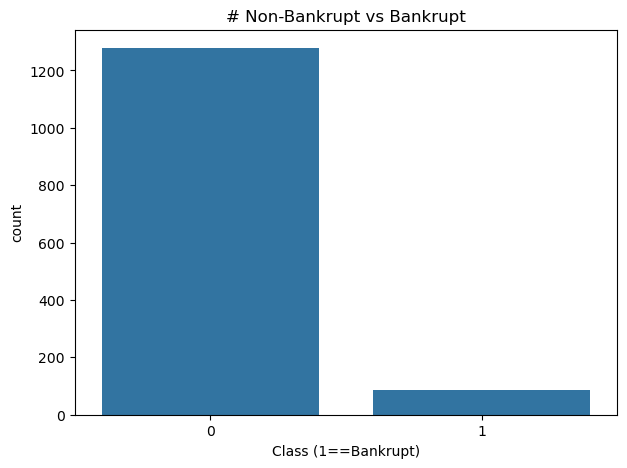

In [102]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="Bankrupt?", data=df_testdata_prediction)
_ = plt.title('# Non-Bankrupt vs Bankrupt')
_ = plt.xlabel('Class (1==Bankrupt)')

# Summary Model Performance

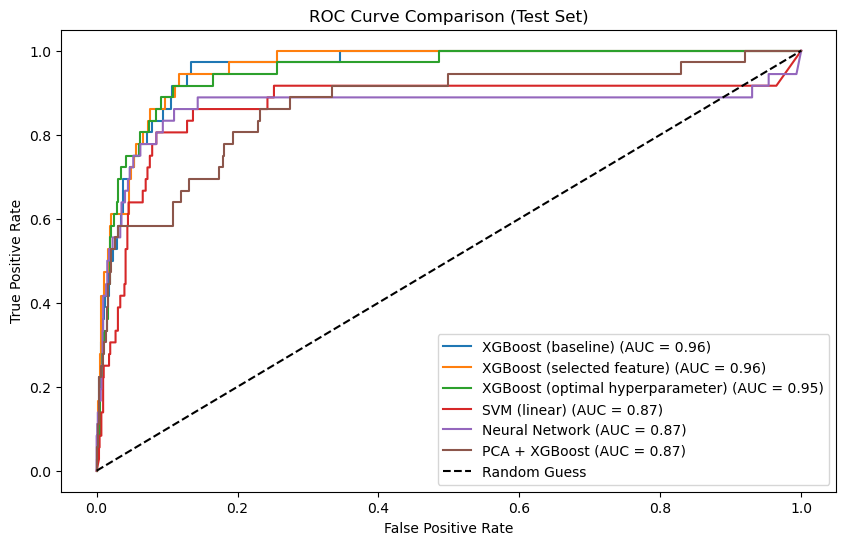

In [121]:
from sklearn.metrics import roc_curve
models = {
    "XGBoost (baseline)": xgb_proba_test,
    "XGBoost (selected feature)": xgb_proba_test_2,
    "XGBoost (optimal hyperparameter)": xgb_proba_test_optimal,
    "SVM (linear)": svc_proba_test,
    "Neural Network": nn_test_prob,
    "PCA + XGBoost": xgb_proba_test_pca
}

plt.figure(figsize=(10, 6))
for name, proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Set)")
plt.legend()
plt.show()

In [126]:
data_test = {
    'model': ['XGBoost (baseline)', 'XGBoost (selected feature)', 'XGBoost (optimal hyperparameter)', 'SVM (linear)', 'SVM (polynomial)', 'Nerual Network', 'PCA + XGBoost'],
    'F1-Score (default)': [0.47, 0.49, 0.47, 0.27, 0.30, 0.31, 0.41],
    'Accuracy': [0.97, 0.97, 0.95, 0.87, 0.93, 0.89, 0.97],
    'AUC': [0.9559, 0.9597, 0.9501, 0.8680, '-', 0.8661, 0.8680]
}

data_valid = {
    'model': ['XGBoost (default)', 'XGBoost (selected feature)', 'XGBoost (optimal hyperparameter)', 'SVM (linear)', 'SVM (polynomial)', 'Nerual Network', 'PCA + XGBoost'],
    'F1-Score (default)': [0.49, 0.55, 0.53, 0.26, 0.33, 0.32, 0.35],
    'Accuracy': [0.97, 0.97, 0.96, 0.87, 0.94, 0.89, 0.96],
    'AUC': [0.9236, 0.9202, 0.9246, 0.8803, '-', 0.8745, 0.8803]
}

df_test = pd.DataFrame(data_test)
df_valid = pd.DataFrame(data_valid)

print("table1: test")
print(df_test)

print("\ntable2: validation")
print(df_valid)


table1: test
                              model  F1-Score (default)  Accuracy     AUC
0                XGBoost (baseline)                0.47      0.97  0.9559
1        XGBoost (selected feature)                0.49      0.97  0.9597
2  XGBoost (optimal hyperparameter)                0.47      0.95  0.9501
3                      SVM (linear)                0.27      0.87   0.868
4                  SVM (polynomial)                0.30      0.93       -
5                    Nerual Network                0.31      0.89  0.8661
6                     PCA + XGBoost                0.41      0.97   0.868

table2: validation
                              model  F1-Score (default)  Accuracy     AUC
0                 XGBoost (default)                0.49      0.97  0.9236
1        XGBoost (selected feature)                0.55      0.97  0.9202
2  XGBoost (optimal hyperparameter)                0.53      0.96  0.9246
3                      SVM (linear)                0.26      0.87  0.8803
4    